### Import Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [2]:
# VGG-19 accept images in this size.
img_width=244
img_height=244

# **Exploratory Data Analysis (EDA)**

##  **For Training**

In [3]:
#Now let us read metadata to get our Y values (multiple lables)
df_train = pd.read_csv('../input/retinal-disease-classification/Training_Set/Training_Set/RFMiD_Training_Labels.csv')

#ID and Disease_Risk are not labels to be trained. So drop them from the dataframe.
df_train = df_train.drop(['ID', 'Disease_Risk'], axis=1)

In [4]:
def check_disease(df):
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (column_name, column) in df.iteritems():
        disease_name.append(column_name)    
        zeroCount.append(df[column_name].value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]
    
    return disease_name, zeroCount, oneCount

# Insert the image ID
def img_id(df,num):
    id_list = []
    for i in range(num):
        id_list.append(i+1)
    df.insert(0,'ID',id_list)

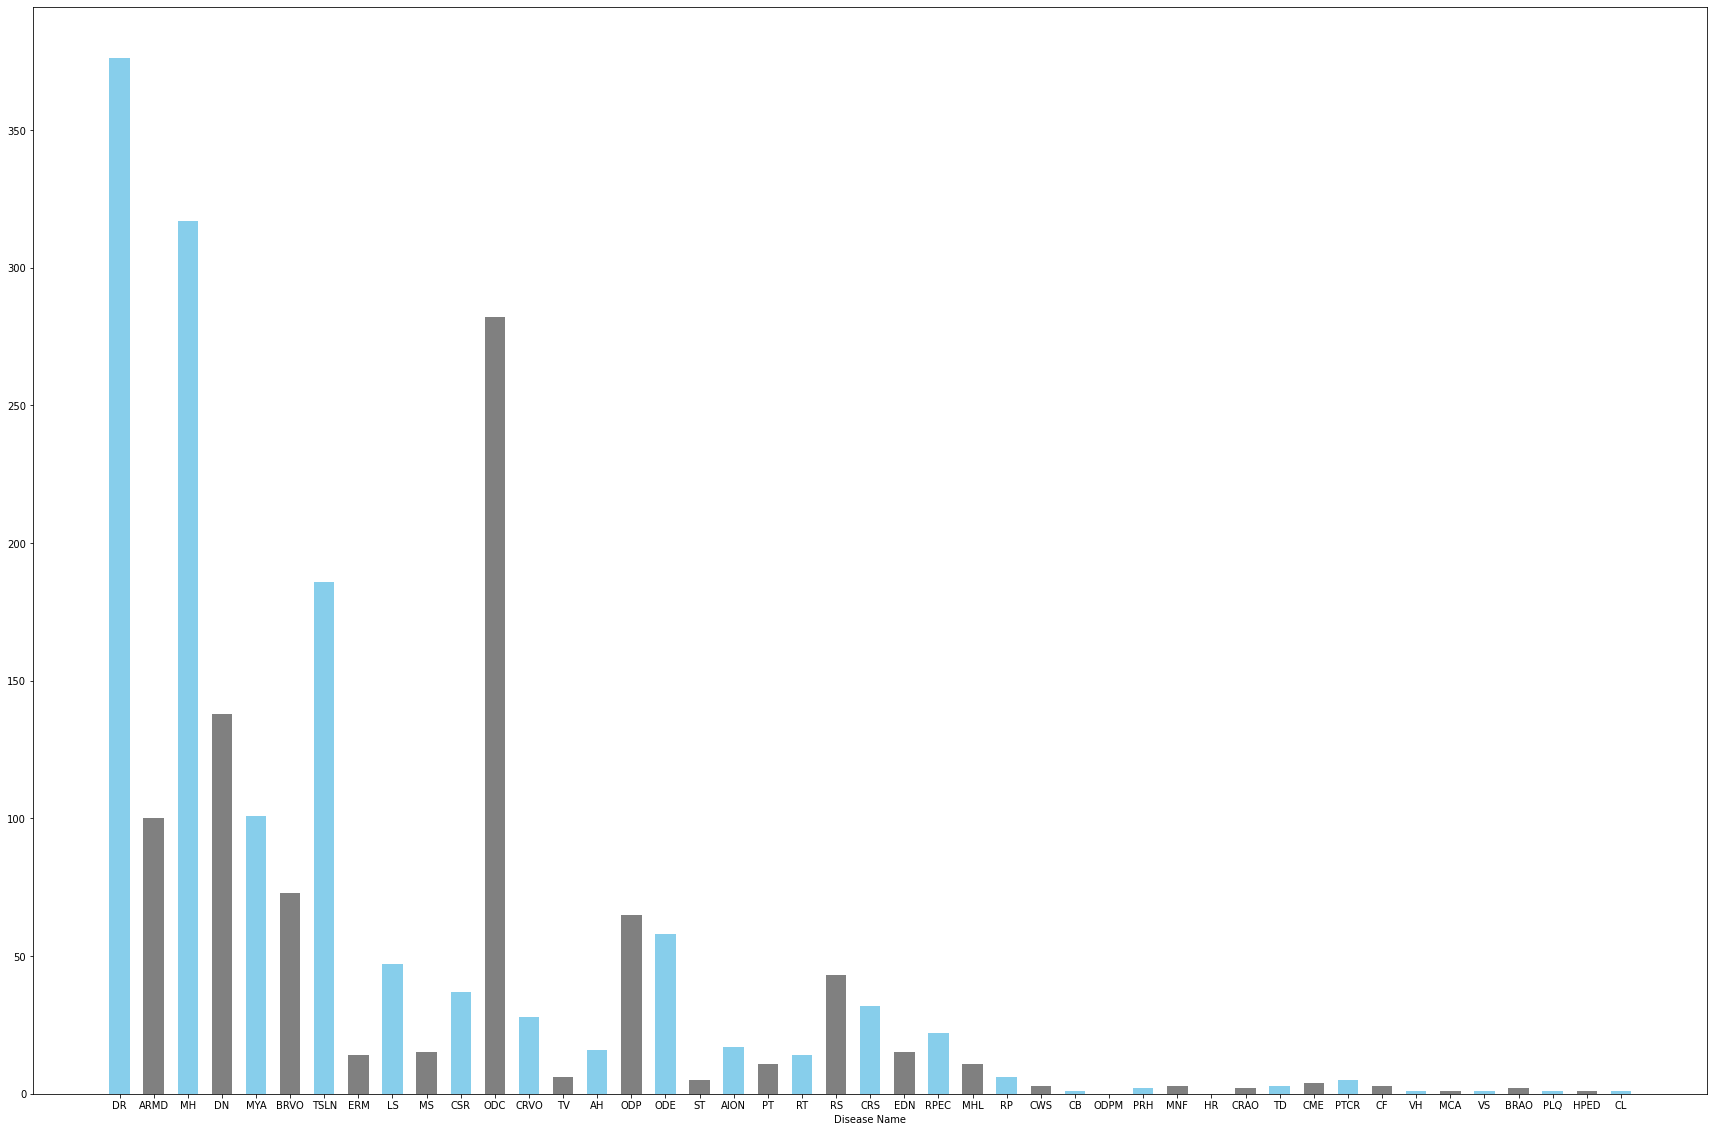

In [5]:
disease_name, zeroCount, oneCount = check_disease(df_train)

fig = plt.figure(figsize=(30,20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [6]:
# The majority of illness classes don't have enough images to train with.The resultant accuracy won't be adequate.
# Let's drops the columns which are below the 100
for i in range(45):
    if oneCount[i] <= 120:
        df_train = df_train.drop([disease_name[i]], axis=1)

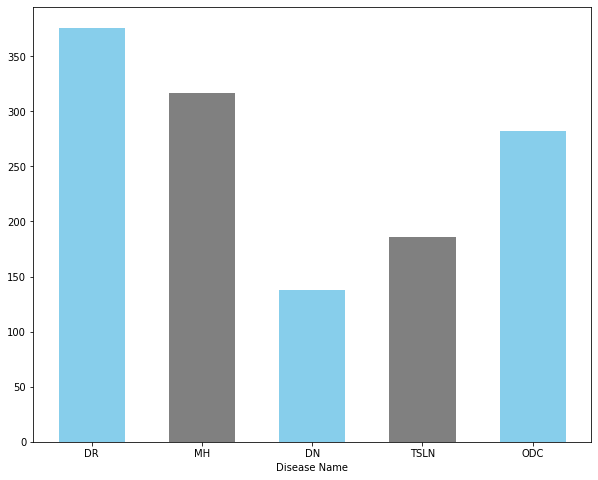

DR appear: 376
MH appear: 317
DN appear: 138
TSLN appear: 186
ODC appear: 282


In [7]:
disease_name, zeroCount, oneCount = check_disease(df_train)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
img_id(df_train,len(df_train))

#### Examine the images in train directory

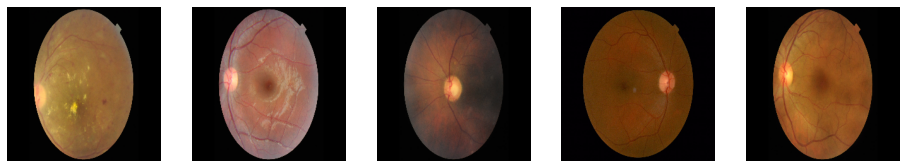

In [8]:
train_dir="../input/retinal-disease-classification/Training_Set/Training_Set/Training"
# Showing 5 images here, selected from train folder
train_images=["1.png","10.png","1000.png","1860.png","1024.png"]
fig = plt.figure(figsize=(16,20))
for i in range(len(train_images)):
        sp=plt.subplot(1, 5, i + 1)
        img = image.load_img(train_dir+"/"+train_images[i], target_size=(img_width,img_height,3))
        img = image.img_to_array(img)
        img = img/255.
        plt.imshow(img)
        sp.axis("off")

In [9]:
X_dataset = []  # a list that will saves all images in numpy array. 
lst=os.listdir(train_dir)
for i in range(len(lst)):
    img = image.load_img(train_dir+'/'+lst[i], target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

#### Setup Albumentations Transform Pipeline

In [ ]:
# import albumentations as alb
# augmentor = alb.Compose([ alb.HorizontalFlip(p=1),])

# for i in range(len(X_dataset)):
#     augmented_img=augmentor(image=X_dataset[i])
#     X_dataset.append(augmented_img["image"])

# ## Now concatenating dataframes for unagmented and augmented images 
# df_train=pd.concat([df_train,df_train])

In [11]:
X_train=np.array(X_dataset)

In [12]:
#ID are not labels to be trained. So drop them from the dataframe.
Y_train = np.array(df_train.drop(['ID'], axis=1))

# **For Testing**

In [13]:
#Now let us read metadata to get our Y values (multiple lables)
df_test = pd.read_csv('../input/retinal-disease-classification/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')    

#ID and Disease_Risk are not labels to be trained. So drop them from the dataframe.
df_test = df_test.drop(['ID', 'Disease_Risk'], axis=1)


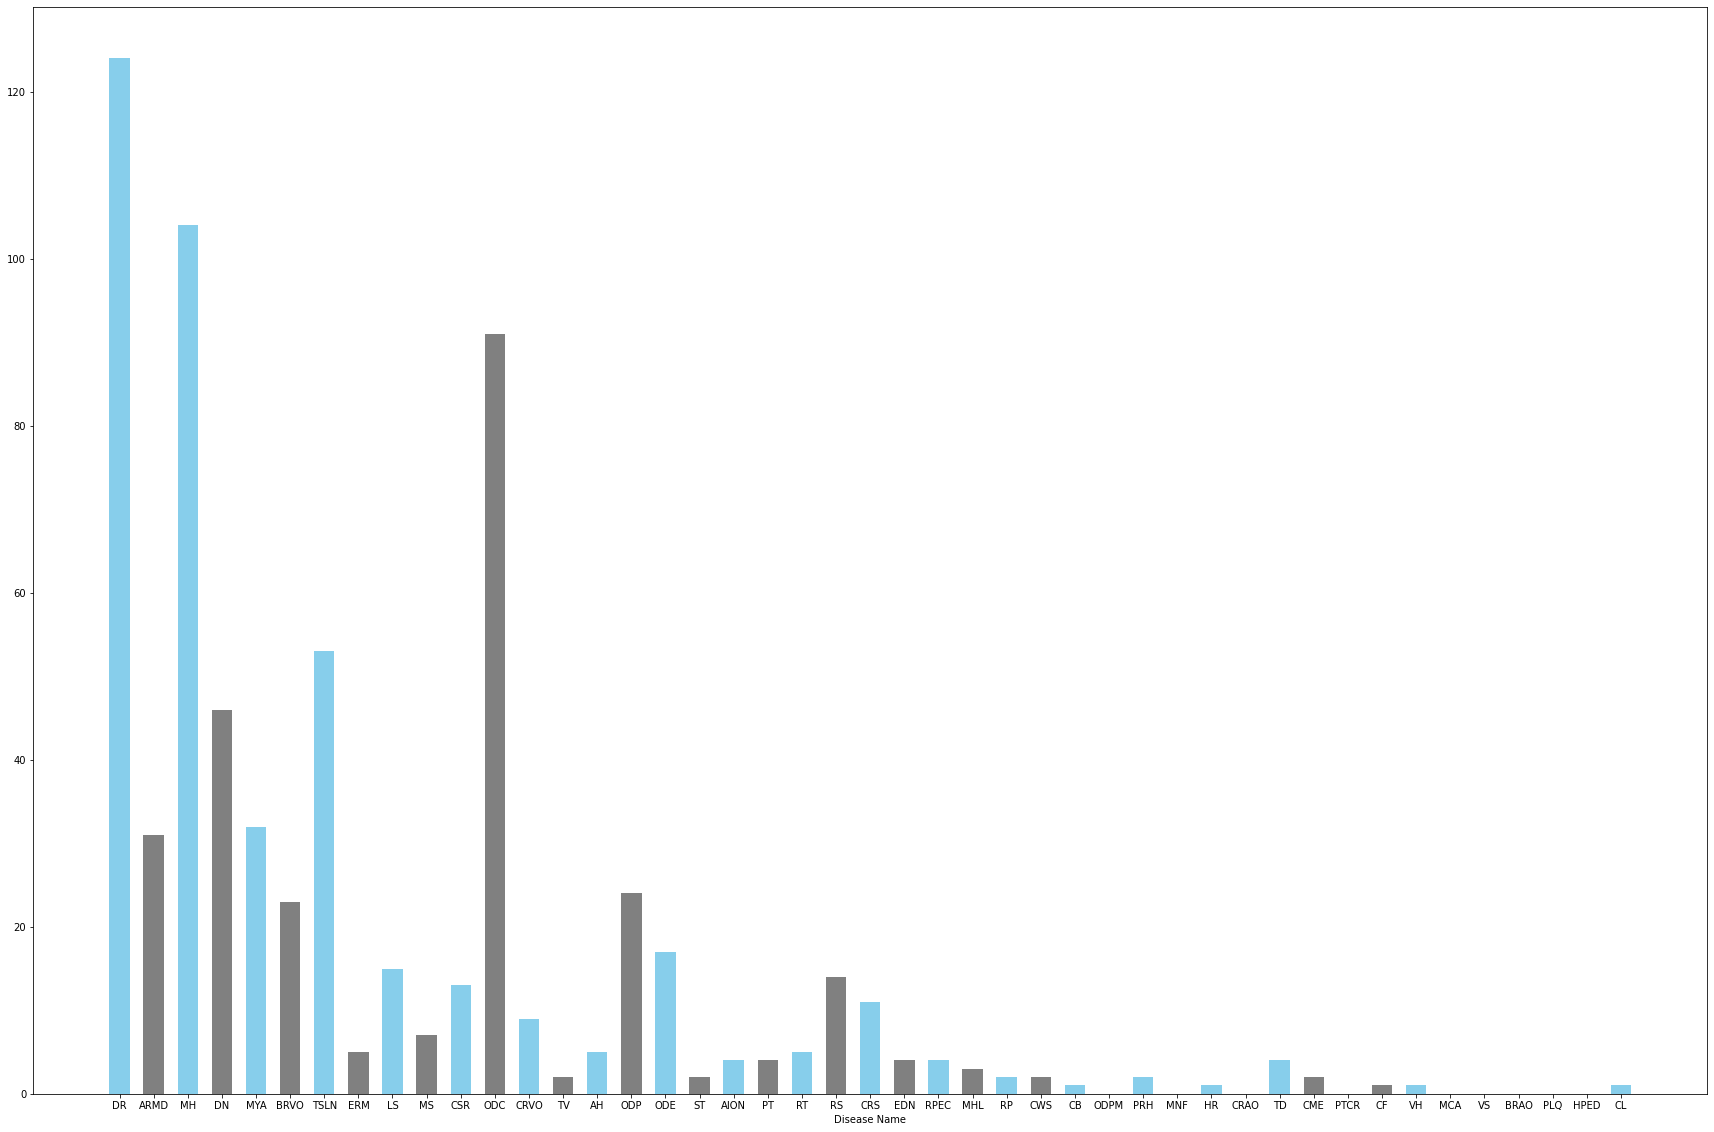

In [14]:
disease_name, zeroCount, oneCount = check_disease(df_test)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [15]:
# Drops the columns which are below the 100
for i in range(45):
    if oneCount[i] <= 40:
        df_test = df_test.drop([disease_name[i]], axis=1)

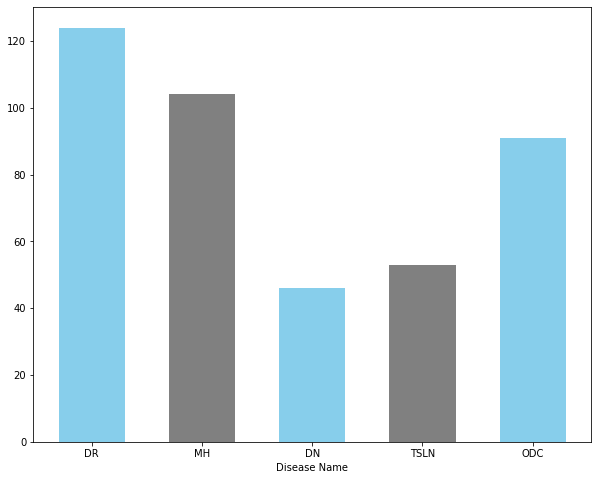

DR appear: 124
MH appear: 104
DN appear: 46
TSLN appear: 53
ODC appear: 91


In [16]:
disease_name, zeroCount, oneCount = check_disease(df_test)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
img_id(df_test,len(df_test))

In [17]:
test_dir='../input/retinal-disease-classification/Test_Set/Test_Set/Test/'
test_X_dataset = []  
test_lst=os.listdir(test_dir)
for i in range(len(test_lst)):
    img = image.load_img(test_dir+'/'+test_lst[i], target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    test_X_dataset.append(img)

In [18]:
X_test = np.array(test_X_dataset)

#ID are not labels to be trained. So drop them from the dataframe.
Y_test = np.array(df_test.drop(['ID'], axis=1))

# Convolutional Neural Network for classifying different diseases in TensorFlow

In [30]:
model_1 = Sequential()

model_1.add(Conv2D(filters=16, kernel_size=(5, 5), padding="same" , activation="relu", input_shape=(img_width,img_height,3)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model_1.add(Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())
# model.add(Dropout(0.2))

model_1.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())
# model.add(Dropout(0.2))

model_1.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())
# model.add(Dropout(0.2))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model_1.add(Dense(5, activation='sigmoid'))


2022-11-05 19:11:07.899720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-05 19:11:07.930521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-05 19:11:07.931265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-05 19:11:07.932777: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [31]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 244, 244, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 244, 244, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 122, 122, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        5

In [32]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history_1 = model_1.fit(X_train, Y_train, epochs=150, validation_data=(X_test, Y_test), batch_size=64)

2022-11-05 19:11:20.315499: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1371709440 exceeds 10% of free system memory.
2022-11-05 19:11:22.019731: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1371709440 exceeds 10% of free system memory.
2022-11-05 19:11:23.352407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2022-11-05 19:11:24.567546: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


30/30 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.2594

2022-11-05 19:11:29.006758: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 457236480 exceeds 10% of free system memory.
2022-11-05 19:11:29.713018: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 457236480 exceeds 10% of free system memory.


30/30 [==============================] - 7s 127ms/step - loss: 0.5316 - accuracy: 0.2594 - val_loss: 0.6845 - val_accuracy: 0.6797
Epoch 2/150
30/30 [==============================] - 3s 89ms/step - loss: 0.4016 - accuracy: 0.3771 - val_loss: 0.7561 - val_accuracy: 0.6797
Epoch 3/150
30/30 [==============================] - 3s 89ms/step - loss: 0.3957 - accuracy: 0.4354 - val_loss: 0.5378 - val_accuracy: 0.6797
Epoch 4/150
30/30 [==============================] - 3s 90ms/step - loss: 0.3938 - accuracy: 0.4432 - val_loss: 0.4429 - val_accuracy: 0.6797
Epoch 5/150
30/30 [==============================] - 3s 93ms/step - loss: 0.3892 - accuracy: 0.4026 - val_loss: 0.4080 - val_accuracy: 0.6797
Epoch 6/150
30/30 [==============================] - 3s 89ms/step - loss: 0.3911 - accuracy: 0.3688 - val_loss: 0.4302 - val_accuracy: 0.6797
Epoch 7/150
30/30 [==============================] - 2s 81ms/step - loss: 0.3883 - accuracy: 0.4568 - val_loss: 0.4015 - val_accuracy: 0.6781
Epoch 8/150
30/30

In [34]:
_, acc = model_1.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")

2022-11-05 19:18:10.015176: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 457236480 exceeds 10% of free system memory.


20/20 [==============================] - 1s 21ms/step - loss: 1.7662 - accuracy: 0.2562
Accuracy =  25.624999403953552 %


### Prediction on Test Data Set

In [35]:
y_predict_1=model_1.predict(X_test)

In [36]:
y_predict_01=(y_predict_1 == y_predict_1.max(axis=1)[:,None]).astype(int)

## Evaluation on model 1

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,y_predict_01, target_names=["DR","MH","DN","TSLN","ODC"]))

              precision    recall  f1-score   support

          DR       0.16      0.24      0.19       124
          MH       0.15      0.16      0.15       104
          DN       0.07      0.17      0.10        46
        TSLN       0.12      0.17      0.14        53
         ODC       0.12      0.20      0.15        91

   micro avg       0.13      0.20      0.15       418
   macro avg       0.12      0.19      0.15       418
weighted avg       0.13      0.20      0.16       418
 samples avg       0.13      0.10      0.11       418



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## CONFUSION MATRIX

cm1=confusion_matrix(Y_test.argmax(axis=1),y_predict_01.argmax(axis=1))

cm_df1 = pd.DataFrame(cm1,
                     index = ['DR','MH','DN','TSLN','ODC'], 
                     columns = ['DR','MH','DN','TSLN','ODC'])

cm_df1

,DR,MH,DN,TSLN,ODC
DR,153,110,84,35,53
MH,30,25,23,9,13
DN,11,11,9,6,8
TSLN,11,7,6,4,3
ODC,7,3,7,5,7


## Fine-Tuning hyperparameters

In [53]:
history_2 = model_1.fit(X_train, Y_train, epochs=500, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/500
30/30 [==============================] - 4s 125ms/step - loss: 0.0572 - accuracy: 0.6370 - val_loss: 1.9696 - val_accuracy: 0.2047
Epoch 2/500
30/30 [==============================] - 3s 88ms/step - loss: 0.0380 - accuracy: 0.6474 - val_loss: 1.8704 - val_accuracy: 0.3281
Epoch 3/500
30/30 [==============================] - 3s 94ms/step - loss: 0.0283 - accuracy: 0.6495 - val_loss: 1.7342 - val_accuracy: 0.3125
Epoch 4/500
30/30 [==============================] - 3s 89ms/step - loss: 0.0121 - accuracy: 0.6375 - val_loss: 1.7058 - val_accuracy: 0.2812
Epoch 5/500
30/30 [==============================] - 2s 79ms/step - loss: 0.0061 - accuracy: 0.6521 - val_loss: 1.7143 - val_accuracy: 0.2641
Epoch 6/500
30/30 [==============================] - 3s 89ms/step - loss: 0.0034 - accuracy: 0.6531 - val_loss: 1.7677 - val_accuracy: 0.2984
Epoch 7/500
30/30 [==============================] - 3s 91ms/step - loss: 0.0017 - accuracy: 0.6510 - val_loss: 1.8119 - val_accuracy: 0.2609
Epoch

In [54]:
y_predict_2=model_1.predict(X_test)

In [55]:
y_predict_02=(y_predict_2 == y_predict_2.max(axis=1)[:,None]).astype(int)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict_02, target_names=["DR","MH","DN","TSLN","ODC"]))

              precision    recall  f1-score   support

          DR       0.20      0.32      0.24       124
          MH       0.16      0.28      0.20       104
          DN       0.05      0.09      0.07        46
        TSLN       0.08      0.11      0.10        53
         ODC       0.13      0.15      0.14        91

   micro avg       0.15      0.22      0.18       418
   macro avg       0.12      0.19      0.15       418
weighted avg       0.14      0.22      0.17       418
 samples avg       0.15      0.12      0.13       418



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
_, acc = model_1.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")

20/20 [==============================] - 0s 20ms/step - loss: 1.8828 - accuracy: 0.2766
Accuracy =  27.656251192092896 %


In [59]:
model_1.save('multi_CNN.h5')

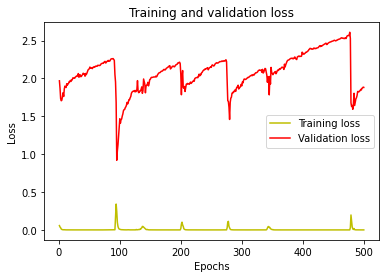

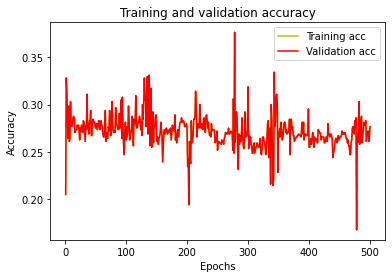

In [61]:
#plot the training and validation accuracy and loss at each epoch
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_2.history['val_accuracy']
val_acc = history_2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
## CONFUSION MATRIX

cm2=confusion_matrix(Y_test.argmax(axis=1),y_predict_02.argmax(axis=1))

cm_df2 = pd.DataFrame(cm2,
                     index = ['DR','MH','DN','TSLN','ODC'], 
                     columns = ['DR','MH','DN','TSLN','ODC'])

cm_df2

,DR,MH,DN,TSLN,ODC
DR,148,136,59,32,60
MH,24,41,13,5,17
DN,10,16,6,3,10
TSLN,15,10,1,1,4
ODC,7,12,3,2,5


# Transfer Learning with VGG19

In [19]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

In [22]:
IMAGE_SIZE=[244,244]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(5, activation='softmax')(x) # We have 5 classes, and so, the prediction is being done 5 classes

#Creating model object 
model_3= Model(inputs=vgg.input, outputs=prediction)

model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0   

In [23]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history_3 = model_3.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), batch_size=32)

2022-11-05 21:27:03.147498: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1371709440 exceeds 10% of free system memory.
2022-11-05 21:27:04.738659: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1371709440 exceeds 10% of free system memory.
2022-11-05 21:27:05.885830: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-11-05 21:27:06.730623: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 22861824 exceeds 10% of free system memory.
2022-11-05 21:27:06.730752: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 22861824 exceeds 10% of free system memory.
2022-11-05 21:27:06.759974: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 22861824 exceeds 10% of free system memory.
2022-11-05 21:27:07.665354: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


60/60 [==============================] - 19s 141ms/step - loss: 1.4155 - accuracy: 0.2609 - val_loss: 1.0642 - val_accuracy: 0.1453
Epoch 2/300
60/60 [==============================] - 7s 122ms/step - loss: 1.0750 - accuracy: 0.3562 - val_loss: 1.0496 - val_accuracy: 0.4203
Epoch 3/300
60/60 [==============================] - 7s 121ms/step - loss: 1.0371 - accuracy: 0.3599 - val_loss: 1.0809 - val_accuracy: 0.1547
Epoch 4/300
60/60 [==============================] - 7s 124ms/step - loss: 1.0076 - accuracy: 0.3719 - val_loss: 1.0895 - val_accuracy: 0.1875
Epoch 5/300
60/60 [==============================] - 8s 136ms/step - loss: 1.0322 - accuracy: 0.3599 - val_loss: 1.1453 - val_accuracy: 0.1250
Epoch 6/300
60/60 [==============================] - 8s 135ms/step - loss: 0.9516 - accuracy: 0.4130 - val_loss: 1.1141 - val_accuracy: 0.3500
Epoch 7/300
60/60 [==============================] - 7s 121ms/step - loss: 0.9595 - accuracy: 0.3865 - val_loss: 1.1167 - val_accuracy: 0.1797
Epoch 8/30

In [24]:
y_predict_3=model_3.predict(X_test)

In [25]:
y_predict_03=(y_predict_3 == y_predict_3.max(axis=1)[:,None]).astype(int)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict_03, target_names=["DR","MH","DN","TSLN","ODC"]))

              precision    recall  f1-score   support

          DR       0.18      0.19      0.18       124
          MH       0.16      0.24      0.19       104
          DN       0.05      0.07      0.05        46
        TSLN       0.06      0.23      0.09        53
         ODC       0.11      0.10      0.10        91

   micro avg       0.11      0.17      0.14       418
   macro avg       0.11      0.16      0.12       418
weighted avg       0.13      0.17      0.14       418
 samples avg       0.11      0.09      0.10       418



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## CONFUSION MATRIX

cm3=confusion_matrix(Y_test.argmax(axis=1),y_predict_03.argmax(axis=1))

cm_df3 = pd.DataFrame(cm3,
                     index = ['DR','MH','DN','TSLN','ODC'], 
                     columns = ['DR','MH','DN','TSLN','ODC'])

cm_df3

,DR,MH,DN,TSLN,ODC
DR,248,0,6,181,0
MH,51,0,4,45,0
DN,24,0,0,21,0
TSLN,11,0,0,20,0
ODC,16,0,0,13,0


## Model Interpretability

In [ ]:
!pip install tf-keras-vis

In [38]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model
model = Model(weights='imagenet', include_top=True)
model.summary()

553476096/553467096 [==============================] - 17s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

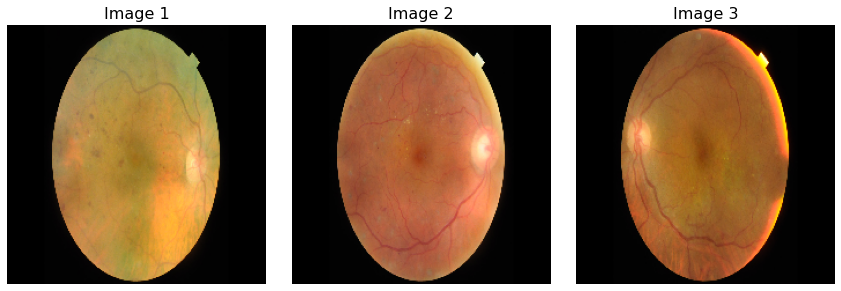

In [39]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg19 import preprocess_input


image_titles=["Image 1", "Image 2","Image 3"]
# Load images and Convert them to a Numpy array
img1 = load_img('../input/retinal-disease-classification/Test_Set/Test_Set/Test/1.png', target_size=(224, 224))
img2 = load_img('../input/retinal-disease-classification/Test_Set/Test_Set/Test/10.png', target_size=(224, 224))
img3 = load_img('../input/retinal-disease-classification/Test_Set/Test_Set/Test/100.png', target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preparing input data for VGG16
X = preprocess_input(images)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()


In [40]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

# Instead of using the ReplaceToLinear instance above,
# you can also define the function from scratch as follows:
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

In [41]:
from tf_keras_vis.utils.scores import CategoricalScore

# 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
score = CategoricalScore([1, 294, 413])

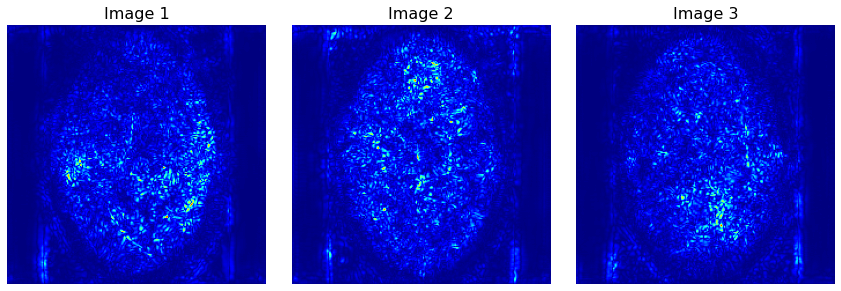

In [42]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score, X)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

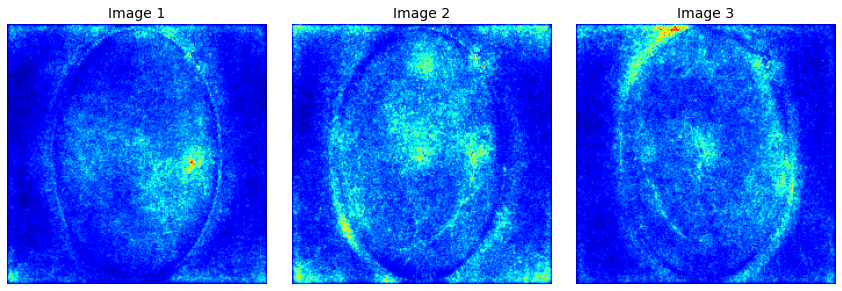

In [44]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()